Whatsapp Analysis

First we need to install the new packages we will use in this project

In [7]:
!pip install regex

#!pip install emoji
#!pip install plotly.express
#!pip install wordcloud
#!git clone https://github.com/amueller/word_cloud.git
#%cd word_cloud

Now we can import the packages to Jupyter 

In [8]:
import re
import regex
import pandas as pd
import numpy as np
import emoji
import plotly.express as px
from collections import Counter
import matplotlib.pyplot as plt
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

ModuleNotFoundError: No module named 'regex'

### 

In [4]:
def startsWithDateAndTime(s):
    pattern = '^\[([0-9]+)([\/-])([0-9]+)([\/-])([0-9]+)[,]? ([0-9]+):([0-9][0-9]):([0-9][0-9])[ ]?(AM|PM|am|pm)?\]'
    result = re.match(pattern, s)
    if result:
        return True
    return False

Quick test to see if the function is working for this format

In [5]:
startsWithDateAndTime("[2020-04-20 6:46:53] Jean Bob: Ok")

True

Lets grab the authors in the file 

In [6]:
def FindAuthor(s):
    patterns = [
        '([\w]+):',                        # First Name
        '([\w]+[\s]+[\w]+):',              # First Name + Last Name
        '([\w]+[\s]+[\w]+[\s]+[\w]+):',    # First Name + Middle Name + Last Name
        '([\w]+)[\u263a-\U0001f999]+:',    # Name and Emoji              
    ]
    pattern = '^' + '|'.join(patterns)
    result = re.match(pattern, s)
    if result:
        return True
    return False

In [40]:
parsedData = [] # List to keep track of data so it can be used by a Pandas dataframe
conversationPath = '/Users/laurentrisser/Desktop/dragons.txt' 
with open(conversationPath, encoding="utf-8") as fp:
    fp.readline() # Skipping first line of the file because contains information related to something about end-to-end encryption
    fp.readline()
    fp.readline()
    messageBuffer = [] 
    date, time, author = None, None, None
    while True:
        line = fp.readline()
        if not line: 
            break 
        line = line.strip()
        if startsWithDateAndTime(line): 
            if len(messageBuffer) > 0: 
                parsedData.append([date, time, author, ' '.join(messageBuffer)]) 
            messageBuffer.clear() 
            date, time, author, message = getDataPoint(line) 
            messageBuffer.append(message) 
        else:
          line= (line.encode('ascii', 'ignore')).decode("utf-8")
          if startsWithDateAndTime(line): 
            if len(messageBuffer) > 0: 
                parsedData.append([date, time, author, ' '.join(messageBuffer)]) 
            messageBuffer.clear() 
            date, time, author, message = getDataPoint(line) 
            messageBuffer.append(message) 
          else:
            messageBuffer.append(line)

NameError: name 'getDataPoint' is not defined

The block below will be fixing the dates

In [41]:
import datetime
def dateconv(date):
  year=''
  if '-' in date:
    year = date.split('-')[2]
    if len(year) == 4:
      return datetime.datetime.strptime(date, "[%Y-%m-%d").strftime("%Y-%m-%d")
    elif len(year) ==2:
      return datetime.datetime.strptime(date, "[%Y-%m-%d").strftime("%Y-%m-%d")
  elif '/' in date:
    year = date.split('/')[2]
    if len(year) == 4:
      return datetime.datetime.strptime(date, "[%Y/%m/%d").strftime("%Y-%m-%d")
    if len(year) ==2:
      return datetime.datetime.strptime(date, "[%Y/%m/%d").strftime("%Y-%m-%d")
df = pd.DataFrame(parsedData, columns=['Date', 'Time', 'Author', 'Message']) # Initialising a pandas Dataframe.
df["Date"] = df["Date"].apply(dateconv)
df["Date"] = pd.to_datetime(df["Date"])

In [42]:
df.head(2)

,Date,Time,Author,Message


In [43]:
df

,Date,Time,Author,Message


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     0 non-null      datetime64[ns]
 1   Time     0 non-null      object        
 2   Author   0 non-null      object        
 3   Message  0 non-null      object        
dtypes: datetime64[ns](1), object(3)
memory usage: 0.0+ bytes


In [45]:
df.Author.unique()

array([], dtype=object)

In [46]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     0 non-null      datetime64[ns]
 1   Time     0 non-null      object        
 2   Author   0 non-null      object        
 3   Message  0 non-null      object        
dtypes: datetime64[ns](1), object(3)
memory usage: 0.0+ bytes


In [47]:
media_messages = df[df['Message'] == 'image omitted'].shape[0]
print(media_messages)

0


In [48]:
def split_count(text):

    emoji_list = []
    data = regex.findall(r'\X', text)
    for word in data:
        if any(char in emoji.UNICODE_EMOJI for char in word):
            emoji_list.append(word)
    flags = regex.findall(u'[\U0001F1E6-\U0001F1FF]', text) 

    return emoji_list

df["emoji"] = df["Message"].apply(split_count)

In [49]:
emojis = sum(df['emoji'].str.len())
print(emojis)

0


In [50]:
total_messages = df.shape[0]
print(total_messages)

0


In [51]:
URLPATTERN = r'(https?://\S+)'
df['urlcount'] = df.Message.apply(lambda x: re.findall(URLPATTERN, x)).str.len()

In [52]:
links = np.sum(df.urlcount)

In [53]:
print("Group Wise Stats")
print("Messages:",total_messages)
print("Media:",media_messages)
print("Emojis:",emojis)
print("Links:",links)

Group Wise Stats
Messages: 0
Media: 0
Emojis: 0
Links: 0


In [54]:
media_messages_df = df[(df['Message'] == 'image omitted')|(df['Message'] == 'video omitted')]

In [55]:
sticker_messages_df = df[df['Message'] == 'sticker omitted']
sticker_messages_df

,Date,Time,Author,Message,emoji,urlcount


In [56]:
messages_df = df.drop(media_messages_df.index)
messages_df = messages_df.drop(sticker_messages_df.index)

In [57]:
messages_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      0 non-null      datetime64[ns]
 1   Time      0 non-null      object        
 2   Author    0 non-null      object        
 3   Message   0 non-null      object        
 4   emoji     0 non-null      object        
 5   urlcount  0 non-null      int64         
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 0.0+ bytes


In [58]:
messages_df['Letter_Count'] = messages_df['Message'].apply(lambda s : len(s))
messages_df['Word_Count'] = messages_df['Message'].apply(lambda s : len(s.split(' ')))
messages_df["MessageCount"]=1

In [59]:
messages_df["emojicount"]= df['emoji'].str.len()

In [60]:
messages_df.tail(10)

,Date,Time,Author,Message,emoji,urlcount,Letter_Count,Word_Count,MessageCount,emojicount


In [61]:
messages_df.to_csv(r'/Users/laurentrisser/Desktop/data.csv', index = False)

Checking the number of unique emoji

In [62]:
total_emojis_list = list(set([a for b in messages_df.emoji for a in b]))
total_emojis = len(total_emojis_list)
print(total_emojis)

0


In [173]:
total_emojis_list = list([a for b in messages_df.emoji for a in b])
emoji_dict = dict(Counter(total_emojis_list))
emoji_dict = sorted(emoji_dict.items(), key=lambda x: x[1], reverse=True)
print(emoji_dict)

[('😂', 770), ('😁', 276), ('😄', 203), ('👍🏻', 172), ('😉', 157), ('👍', 124), ('😜', 86), ('🤣', 75), ('😅', 74), ('🤔', 60), ('😀', 53), ('😝', 48), ('😱', 37), ('🤪', 33), ('😆', 32), ('😃', 28), ('🍾', 23), ('😭', 16), ('😊', 15), ('😎', 14), ('😡', 14), ('💪', 14), ('👌', 13), ('😍', 12), ('❄', 12), ('🙄', 10), ('🍻', 10), ('☹️', 10), ('😢', 10), ('☃', 9), ('👍🏼', 9), ('😩', 9), ('😯', 8), ('😒', 8), ('😤', 8), ('🍺', 8), ('🚴\u200d♂️', 8), ('😋', 7), ('🥂', 7), ('😓', 6), ('😙', 6), ('🧐', 6), ('🚴', 6), ('🙃', 5), ('😬', 5), ('😷', 5), ('🚲', 5), ('💶', 5), ('🏃🏽', 4), ('😛', 4), ('☺', 4), ('🍌', 4), ('🤗', 4), ('🤮', 4), ('🤫', 4), ('🥨', 4), ('🍷', 4), ('🤥', 3), ('😨', 3), ('☁️', 3), ('😰', 3), ('🙂', 3), ('⛄', 3), ('😘', 3), ('🥵', 3), ('🤢', 3), ('🤘', 3), ('😳', 3), ('🤷🏻\u200d♂', 2), ('🤒', 2), ('😮', 2), ('⛷️', 2), ('💪🏻', 2), ('🌧', 2), ('🇨🇵', 2), ('🎁', 2), ('🎄', 2), ('🤞', 2), ('😈', 2), ('🙌', 2), ('🦵', 2), ('🐌', 2), ('😵', 2), ('🥳', 2), ('☔', 2), ('🏍', 2), ('🍕', 2), ('🤓', 1), ('🤴🏻', 1), ('✈️', 1), ('😟', 1), ('🤭', 1), ('🏎️', 1), ('❄️', 

In [174]:
emoji_df = pd.DataFrame(emoji_dict, columns=['emoji', 'count'])
emoji_df

,emoji,count
0,😂,770
1,😁,276
2,😄,203
3,👍🏻,172
4,😉,157
...,...,...
134,❤️,1
135,🤑,1
136,👑,1
137,🤡,1


In [175]:
import plotly.express as px
fig = px.pie(emoji_df, values='count', names='emoji')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [176]:
# Creates a list of unique Authors
l = messages_df.Author.unique()
for i in range(len(l)):
  dummy_df = messages_df[messages_df['Author'] == l[i]]
  total_emojis_list = list([a for b in dummy_df.emoji for a in b])
  emoji_dict = dict(Counter(total_emojis_list))
  emoji_dict = sorted(emoji_dict.items(), key=lambda x: x[1], reverse=True)
  print('Emoji Distribution for', l[i])
  author_emoji_df = pd.DataFrame(emoji_dict, columns=['emoji', 'count'])
  fig = px.pie(author_emoji_df, values='count', names='emoji')
  fig.update_traces(textposition='inside', textinfo='percent+label')
  fig.show()

Emoji Distribution for Denis Weber


Emoji Distribution for Gilles Jean Pierre


Emoji Distribution for Fabien Cop


Emoji Distribution for Aurelien Pointereau


Emoji Distribution for Rodrigue Voison


Emoji Distribution for Didier Muckensturm


Emoji Distribution for Hervé Stratenmeyer


Emoji Distribution for Laurent


Emoji Distribution for Cyrille Millet Pfuch


Emoji Distribution for Marc


Emoji Distribution for Eric Pally


Emoji Distribution for Pierre


Emoji Distribution for FX Laurent


Emoji Distribution for Hervé Dupont


Emoji Distribution for Matthieu Liehn


Emoji Distribution for Alexandre Risser


Text(0, 0.5, 'Date')

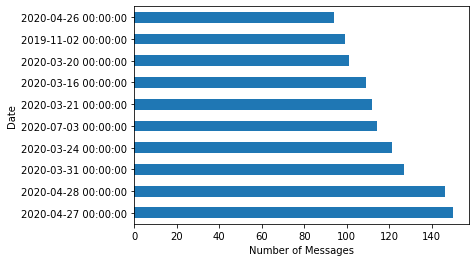

In [177]:
messages_df['Date'].value_counts().head(10).plot.barh()
plt.xlabel('Number of Messages')
plt.ylabel('Date')

In [183]:

def dayofweek(i):
  l = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
  return l[i];
day_df=pd.DataFrame(messages_df["Message"])
day_df['day_of_date'] = messages_df['Date'].dt.weekday
day_df['day_of_date'] = day_df["day_of_date"].apply(dayofweek)
day_df["messagecount"] = 1
day = day_df.groupby("day_of_date").sum()
day.reset_index(inplace=True)

fig = px.line_polar(day, r='messagecount', theta='day_of_date', line_close=True)
fig.update_traces(fill='toself')
fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0,1600]
    )),
  showlegend=False
)
fig.show()